In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statistics
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [64]:
df = pd.read_csv("/content/sample_data/Presos_MissForestv2.csv", delimiter=';', skipinitialspace=True)

In [66]:
#Get the input features
columns = df.columns
class_name = 'WrittenUpOrFoundGuiltyOfBreakingAnyRules'
columns_tmp = list(columns)
columns_tmp.remove(class_name)

x, x_test, y, y_test = train_test_split(df[columns_tmp], df[class_name], test_size=0.1)

model = RandomForestClassifier(criterion = 'entropy', max_depth = 10, n_estimators = 100) 

In [67]:
#DEFININDO QUANTIDADE DE FOLDS
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

FOLD: 1
              precision    recall  f1-score   support

           0       0.79      0.71      0.75        21
           1       0.40      0.50      0.44         8

    accuracy                           0.66        29
   macro avg       0.59      0.61      0.60        29
weighted avg       0.68      0.66      0.67        29



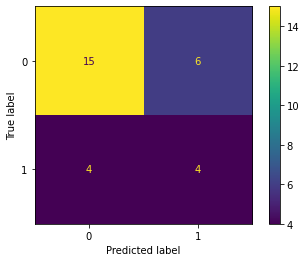

---------------------------------------------------------
FOLD: 2
              precision    recall  f1-score   support

           0       0.68      0.79      0.73        19
           1       0.43      0.30      0.35        10

    accuracy                           0.62        29
   macro avg       0.56      0.54      0.54        29
weighted avg       0.59      0.62      0.60        29



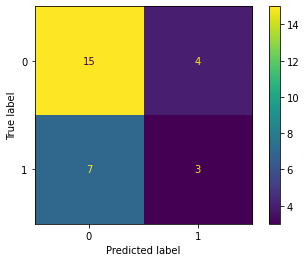

---------------------------------------------------------
FOLD: 3
              precision    recall  f1-score   support

           0       0.71      0.89      0.79        19
           1       0.60      0.30      0.40        10

    accuracy                           0.69        29
   macro avg       0.65      0.60      0.60        29
weighted avg       0.67      0.69      0.66        29



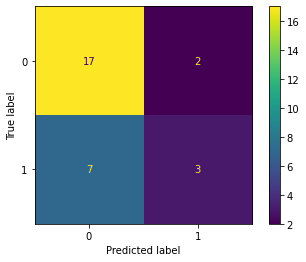

---------------------------------------------------------
FOLD: 4
              precision    recall  f1-score   support

           0       0.62      0.93      0.74        14
           1       0.86      0.43      0.57        14

    accuracy                           0.68        28
   macro avg       0.74      0.68      0.66        28
weighted avg       0.74      0.68      0.66        28



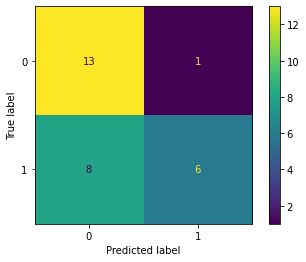

---------------------------------------------------------
FOLD: 5
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        15
           1       0.77      0.77      0.77        13

    accuracy                           0.79        28
   macro avg       0.78      0.78      0.78        28
weighted avg       0.79      0.79      0.79        28



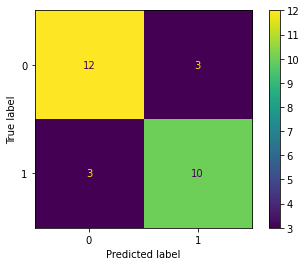

---------------------------------------------------------
FOLD: 6
              precision    recall  f1-score   support

           0       0.63      0.86      0.73        14
           1       0.78      0.50      0.61        14

    accuracy                           0.68        28
   macro avg       0.70      0.68      0.67        28
weighted avg       0.70      0.68      0.67        28



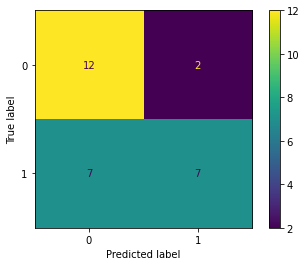

---------------------------------------------------------
FOLD: 7
              precision    recall  f1-score   support

           0       0.68      0.76      0.72        17
           1       0.56      0.45      0.50        11

    accuracy                           0.64        28
   macro avg       0.62      0.61      0.61        28
weighted avg       0.63      0.64      0.63        28



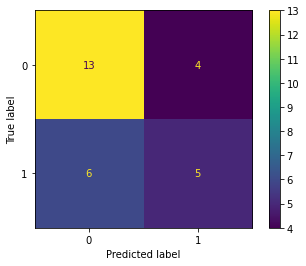

---------------------------------------------------------
FOLD: 8
              precision    recall  f1-score   support

           0       0.50      0.71      0.59        14
           1       0.50      0.29      0.36        14

    accuracy                           0.50        28
   macro avg       0.50      0.50      0.48        28
weighted avg       0.50      0.50      0.48        28



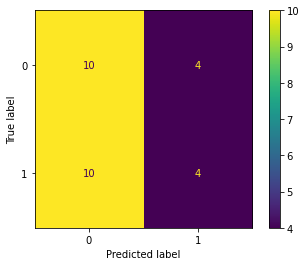

---------------------------------------------------------
FOLD: 9
              precision    recall  f1-score   support

           0       0.60      0.53      0.56        17
           1       0.38      0.45      0.42        11

    accuracy                           0.50        28
   macro avg       0.49      0.49      0.49        28
weighted avg       0.52      0.50      0.51        28



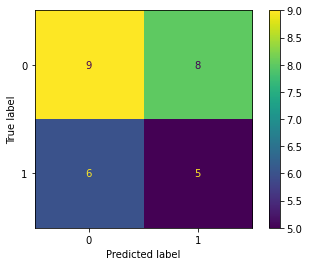

---------------------------------------------------------
FOLD: 10
              precision    recall  f1-score   support

           0       0.50      0.92      0.65        12
           1       0.83      0.31      0.45        16

    accuracy                           0.57        28
   macro avg       0.67      0.61      0.55        28
weighted avg       0.69      0.57      0.54        28



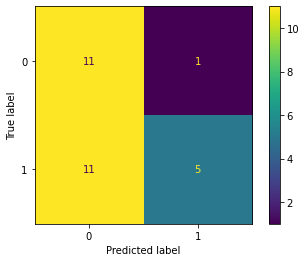

---------------------------------------------------------
Precisão média na validação das classes Inferior e Superior:  [0.65 0.61]
----------------------------------------------------------------
Recall médio na validação das classes Inferior e Superior:  [0.79 0.43]
----------------------------------------------------------------
F1 score médio na validação das classes Inferior e Superior:  [0.71 0.49]


In [68]:
melhor = 0
#SE O DATASET FOR UM PANDAS DATAFRAME USAR iloc, SE FOR UM NUMPY ARRAY USAR take
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
import copy

fold = 1
labels = ['0', '1']
labels2 = [0, 1]

precision_valid = [0,0]
recall_valid = [0,0]
fscore_valid = [0,0]

for train_index, valid_index in kf.split(x):
    x_train = x.iloc[train_index].loc[:]
    y_train = y.iloc[train_index]    
    
    x_valid = x.iloc[valid_index].loc[:]
    y_valid = y.iloc[valid_index]
    
    model.fit(x_train, y_train)
    predito = model.predict(x_valid)
    
    #Calculando as métricas
    precision,recall,fscore,support = precision_recall_fscore_support(y_valid, predito, average=None)   
    precision_valid = np.add(precision_valid,precision)
    recall_valid = np.add(recall_valid,recall)
    fscore_valid = np.add(fscore_valid,fscore)     

    acuracia = np.mean(y_valid == predito)
    
    if acuracia > melhor:          
        melhor = acuracia
        best_model = copy.deepcopy(model)
    
    print('FOLD: ' + str(fold))
    print(metrics.classification_report(y_valid,predito, target_names=labels))
    
    cm = metrics.confusion_matrix(y_valid,predito, labels=labels2)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels2)
    disp.plot()
    plt.show()
    
    fold += 1
    print('---------------------------------------------------------')

print("Precisão média na validação das classes Inferior e Superior: " , np.round(precision_valid/10,2))
print("----------------------------------------------------------------")
print("Recall médio na validação das classes Inferior e Superior: " ,  np.round(recall_valid/10,2))
print("----------------------------------------------------------------")
print("F1 score médio na validação das classes Inferior e Superior: " ,  np.round(fscore_valid/10,2))

In [69]:
#Teste
p = best_model.predict(x_test)

print(classification_report(y_test, p))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83        25
           1       0.44      0.57      0.50         7

    accuracy                           0.75        32
   macro avg       0.66      0.69      0.67        32
weighted avg       0.78      0.75      0.76        32

